In [1]:
import h5py
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Read all data from the nodes and edges file saved by build_network.py

In [2]:
def SaveDataToDF(f):
    myData = []
    myDataNames = []
    def saveDat(item):
        if 'Data' in str(f[item].id):
            data2use = f[item][()]
            if data2use.ndim == 2:#some groups have multiple columns and this messes up the translation to a df at the end of this function
                [a,b] = data2use.shape
                for col in np.arange(0,b):
                    myData.append(data2use[:,col])
                    dataName = (f[item].name).split('/')[-1] + str(col)
                    myDataNames.append(dataName)
            else:
                myData.append(f[item][()])
                dataName = (f[item].name).split('/')[-1]
                myDataNames.append(dataName)
        
    f.visit(saveDat)
    allData = pd.DataFrame(myData).T
    allData.columns = myDataNames
    f.close()
    return allData

In [3]:
pathname = 'network'

In [71]:
f = h5py.File(os.path.join(pathname,'biophysical_biophysical_edges.h5'), 'r')
edgesDF = SaveDataToDF(f) 
f = h5py.File(os.path.join(pathname,'biophysical_nodes.h5'), 'r')
nodesDF = SaveDataToDF(f)

# using bmtools

In [9]:
cmd = 'bmtools plot --config simulation_configLFP.json positions'

In [17]:
cmd = 'bmtools plot --config simulation_configLFP.json  connection total'

In [18]:
cmd = 'bmtools plot --config simulation_configLFP.json  connection --sids pop_name --tids pop_name total'

In [22]:
node_types = pd.read_csv(os.path.join('network','biophysical_node_types.csv'))

In [21]:
nodeNames = ['AAC_SO','OLM_SO','PV_SO','Pyr_SP','AAC_SP','PV_SP','AAC_SR','PV_SR']

In [31]:
node_types.iloc[1]

node_type_id model_template pop_name model_type rotation_angle_zaxis morphology mem_potential    101 hoc:olmcell OLM biophysical 1.570796326794...
Name: 1, dtype: object

# change the node ids to node names

In [93]:
cellLocations = pd.read_csv('cell_locations.csv')
idNames = np.unique(nodesDF['node_type_id'])
cellNames = np.unique(cellLocations['Cell type'])
array = cellLocations['Cell type']
idxs = np.unique(cellLocations['Cell type'],return_index=True)[1]
cellNames = [array[index] for index in sorted(idxs)]#use the names in the order in which the id's appear
nodesDF = nodesDF.replace({'node_type_id':idNames},{'node_type_id':cellNames})

In [ ]:
import plotly.express as px
fig = px.scatter_3d(nodesDF,x ='positions0', y='positions1', z='positions2',
                    color = 'node_type_id',
                    opacity = 0.7)
fig.update_traces(marker_size = 6)
fig.write_html('networkNodes2.html',auto_open=True)

# plot nodes edges - wip

In [ ]:
#find the node source id and get its position, then find the destination node id, and get its position
#there will be a -1 x 6 array of the source to target connections

In [315]:
xlocofEdgeSource = nodesDF['positions0'][np.array(edgesDF['source_node_id'])]
YlocofEdgeSource = nodesDF['positions1'][np.array(edgesDF['source_node_id'])]
ZlocofEdgeSource = nodesDF['positions2'][np.array(edgesDF['source_node_id'])]
xlocofEdgedest = nodesDF['positions0'][np.array(edgesDF['target_node_id'])]
YlocofEdgedest = nodesDF['positions1'][np.array(edgesDF['target_node_id'])]
ZlocofEdgedest = nodesDF['positions2'][np.array(edgesDF['target_node_id'])]
locsList = [xlocofEdgeSource,YlocofEdgeSource,ZlocofEdgeSource,xlocofEdgedest,YlocofEdgedest,ZlocofEdgedest]
locsList = [np.array(item).reshape(1,-1) for item in locsList]
df = pd.DataFrame(np.concatenate(locsList)).T
fig = px.line_3d(df, x=0, y=1,z=2)
fig.write_html('testfig.html',auto_open=True)


In [316]:
source,dest = np.array(edgesDF['source_node_id']),np.array(edgesDF['target_node_id'])
pairs = np.vstack((source,dest)).T
pairs = pairs.astype(int)
X,Y,Z = np.array(nodesDF['positions0']),np.array(nodesDF['positions1']),np.array(nodesDF['positions2'])

In [317]:
import plotly.graph_objects as go
x_lines = []
y_lines = []
z_lines = []
nameList = list(set(nodesDF['node_type_id']))

#create the coordinate list for the lines
for p in pairs:
    for i in range(2):
        x_lines.append(X[p[i]])
        y_lines.append(Y[p[i]])
        z_lines.append(Z[p[i]])
    x_lines.append(None)
    y_lines.append(None)
    z_lines.append(None)

trace2 = go.Scatter3d(
    x=x_lines,
    y=y_lines,
    z=z_lines,
    mode='lines',
    name='lines'
)

Name2Use = nameList[0]
trace1 = go.Scatter3d(
    x = np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions0']),
    y=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions1']),
    z=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions2']),
    mode='markers',
    name = Name2Use
    
)
Name2Use = nameList[1]
trace3 = go.Scatter3d(
    x = np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions0']),
    y=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions1']),
    z=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions2']),
    mode='markers',
    name = Name2Use
    
)
Name2Use = nameList[2]
trace4 = go.Scatter3d(
    x = np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions0']),
    y=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions1']),
    z=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions2']),
    mode='markers',
    name = Name2Use
    
)

Name2Use = nameList[3]
trace5 = go.Scatter3d(
    x = np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions0']),
    y=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions1']),
    z=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions2']),
    mode='markers',
    name = Name2Use
    
)

Name2Use = nameList[4]
trace6 = go.Scatter3d(
    x = np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions0']),
    y=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions1']),
    z=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions2']),
    mode='markers',
    name = Name2Use
    
)

Name2Use = nameList[5]
trace7 = go.Scatter3d(
    x = np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions0']),
    y=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions1']),
    z=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions2']),
    mode='markers',
    name = Name2Use
    
)

Name2Use = nameList[6]
trace8 = go.Scatter3d(
    x = np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions0']),
    y=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions1']),
    z=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions2']),
    mode='markers',
    name = Name2Use
    
)

Name2Use = nameList[7]
trace9 = go.Scatter3d(
    x = np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions0']),
    y=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions1']),
    z=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions2']),
    mode='markers',
    name = Name2Use
    
)



figlines = go.Figure(data=[trace1, trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9])


In [372]:
figlines.write_html('testfig.html',auto_open=True)

### construct adjacency matrix of the directed graph

In [ ]:
# nxn nodeids
#each row is the number of outgoing connections to nodeids in the columns

In [15]:
targetIDs = np.array(edgesDF['target_node_id'])
sourceIDs = np.array(edgesDF['source_node_id'])
source2targetIDs = pd.DataFrame(np.vstack((sourceIDs,targetIDs))).T
source2targetIDs.columns = ['source','target']
df = source2targetIDs
nodeArray = np.array(df)# nice to have a df for viewing and array for computing

In [16]:
#get the counts of source to target

In [17]:
IDS = np.arange(0,len(np.unique(df['source'])))
adj = np.zeros((len(IDS),len(IDS)))#nxn matrix


In [18]:
for i in range(0,len(IDS)):
    idxs = nodeArray[nodeArray[:,0]==i][:,1]#grab the targets for which the source id is i...
    #add something for checking unique, or rate of messages, or something to add as the values instead of just 1 for a connection.
    adj[i][idxs.astype(int)] = 1#... and place a 1 in that location. ideally this is the count of connections to this target, but for now it is only 1 connection in the model

In [23]:
np.save('adjacencyMatrix',adj)

# use the adjacency matrix to calculate summary statistics about the network

In [7]:
import networkx as nx

In [6]:
adj = np.load('adjacencyMatrix.npy')
cellLocations = pd.read_csv('cell_locations.csv')


In [131]:
#get a list of the layer names in order of 
layerList = cellLocations['Cell type']
idxs = np.unique(cellLocations['Cell type'],return_index=True)[1]
layerNames = [array[index] for index in sorted(idxs)]#use the names in the order in which the id's appear


In [68]:
# first get a df of the cell layers and their index boundaries

In [41]:
def getSectionBeginEnd(layerNames,name):
    group = np.where(layerNames == name)[0]
    begin = group[0]
    end = group[len(group)-1]
    return begin,end

In [141]:
starts,ends = [], []

nameSet = list(set(layerNames))
for name in layerNames:
    begin, end = getSectionBeginEnd(layerList,name)
    starts.append(begin)
    ends.append(end)


In [142]:
df1 = pd.DataFrame(starts,index = nameSet, columns = ['start'])
df2 = pd.DataFrame(ends,index = nameSet, columns = ['end'])
layerIdxsDF = pd.concat([df1,df2],axis=1)
layerIdxsDF

,start,end
AAC in SP layer,0,34
Pyr in SP layer,35,198
AAC in SO layer,199,330
PV in SO layer,331,31480
OLM in SO layer,31481,31583
PV in SR layer,31584,31971
PV in SP layer,31972,31980
AAC in SR layer,31981,32013


In [78]:
G = nx.from_numpy_array(adj,create_using=nx.DiGraph)#directed graph of the network, recall rows are senders, columns are recievers

In [237]:
def groupSumStats(G,IDS):
    out_degree_centrality = nx.group_out_degree_centrality(G,IDS)
    in_degree_centrality = nx.group_in_degree_centrality(G,IDS)
    clusterDict = nx.clustering(G, IDS)
    avgClustering = np.mean([clusterDict[key] for key in clusterDict])
    return [in_degree_centrality,out_degree_centrality,avgClustering]

In [209]:
def calcNetStats(G,layerList,layerNames):
    AllStats = []
    for name in layerNames:
        IDS = np.where(layerList == name)[0]
        AllStats.append(groupSumStats(G,IDS))
    return AllStats

In [238]:
netStats = calcNetStats(G,layerList,layerNames)

[0, 13732, 4]


In [242]:
results.to_csv('networkStats.csv')

In [175]:
# make a dataframe with rows are layer names, and columns with the given metric's summary stats

In [241]:

netStatNames = ["inDeg_cent","outDeg_cent","avgClustering"]
results = pd.DataFrame(netStats,columns = netStatNames,index = layerNames)
results

,inDeg_cent,outDeg_cent,avgClustering
AAC in SO layer,0.176178,0.712812,0.002812
OLM in SO layer,0.977991,0.998619,0.001232
PV in SO layer,0.817013,0.969418,0.005264
Pyr in SP layer,1.000000,1.000000,0.057975
AAC in SP layer,0.450158,0.960014,0.002537
PV in SP layer,0.986688,0.994720,0.005061
AAC in SR layer,0.054460,0.290267,0.002830
PV in SR layer,0.353960,0.608955,0.005015


In [240]:
#other metrics to explore:
print(nx.shortest_path(G, source=0, target=4))

[0, 13732, 4]


In [114]:
test.index

RangeIndex(start=0, stop=1, step=1)

In [ ]:
#just get the indices of the layer ranges, and comput the sum stats over that in the adj matrix

In [42]:
np.where(cent==max(cent))

(array([93], dtype=int64),)

In [46]:
layerNames[np.where(cent==max(cent))[0]]

93    OLM in SO layer
Name: node_type_id, dtype: object

In [29]:
adjacencyDF = pd.DataFrame(adj,columns = IDS,index=IDS)

32014

import h5py
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd# model output results

In [125]:
f = h5py.File(os.path.join('output','spikes.h5'), 'r')
spikesDF = SaveDataToDF(f) 

In [126]:
f = h5py.File(os.path.join('output','v_report.h5'), 'r')
traces = f['report/biophysical/data'][()]
f.close()

In [134]:
spikingCellIDs

array([   1, 1519, 2918])

In [141]:
spikesDF

,node_ids,timestamps
0,1.0,115.3
1,1519.0,122.3
2,1519.0,160.6
3,2918.0,122.5
4,2918.0,160.8


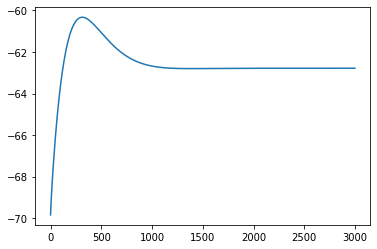

In [138]:
plt.plot(traces[:,1519])

In [135]:
spikesDF['node_ids'][spikesDF['node_ids'] == 1].keys()[0]

0

In [144]:
spikingCellIDs = np.unique(np.array(spikesDF['node_ids'],dtype=int))
spikingCellIDs

array([   1, 1519, 2918])

[   1 1519 2918]


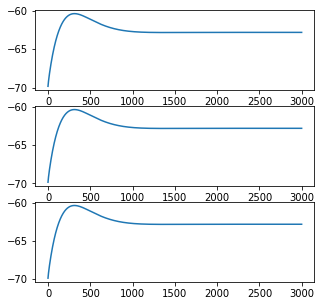

In [128]:
spikingCellIDs = np.unique(np.array(spikesDF['node_ids'],dtype=int))
if len(spikingCellIDs) <=1:
    print('only 1 spiking cell')
    plt.plot(traces)
else:
    
    fig,ax = plt.subplots(len(spikingCellIDs),figsize=(5,5))
    i = 0
    for cell in spikingCellIDs:
        ax[i].plot(traces[:,cell])
        i+=1
    print(spikingCellIDs)


# ECP plotting

In [42]:
f = h5py.File('output/ecp.h5', 'r')
data = f['ecp/data'][()]
time = f['ecp/time'][()]
f.close()

/home/dpd4k4/CA1_model/CA1_Model_env/lib64/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "background" which is no longer supported as of 3.3 and will become an error two minor releases later
  


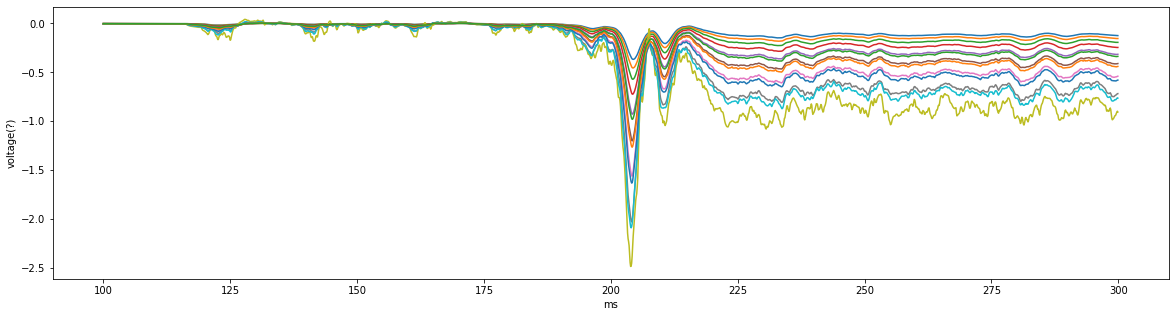

In [52]:
start,end = 1000, 3000
plt.figure(figsize=(20,5))
plt.plot(np.arange(time[0],time[1],time[2])[start:end],data[start:end])
plt.xlabel('ms')
plt.ylabel('voltage(?)')
plt.savefig('ecp.png',dpi=400,background='w')
plt.show()

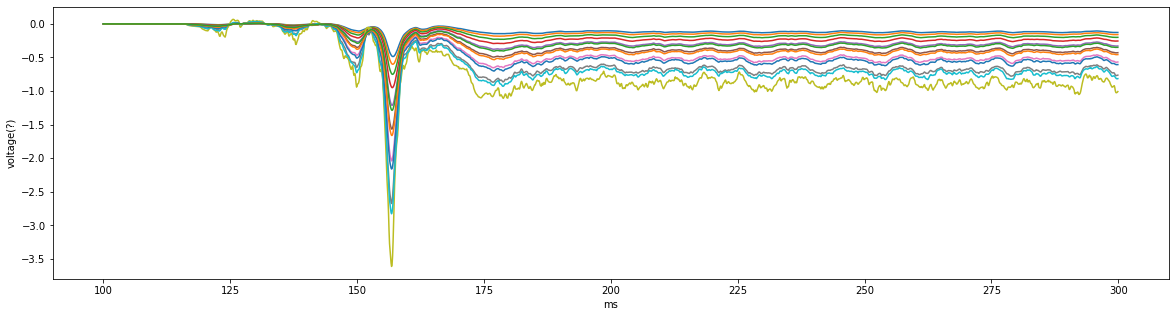

In [305]:
start,end = 1000, 3000
plt.figure(figsize=(20,5))
plt.plot(np.arange(time[0],time[1],time[2])[start:end],data[start:end])
plt.xlabel('ms')
plt.ylabel('voltage(?)')
#plt.savefig('ecp.png',dpi=400,background='w')
plt.show()

In [14]:
vclampfile = np.ones((3000))*-63
np.save("vclamp_input_file.csv",vclampfile)

In [6]:
from scipy import signal

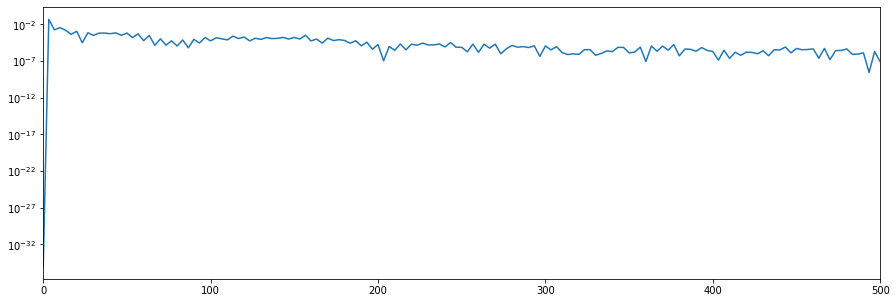

In [7]:
fs = 10000 
f, Pxx_den = signal.periodogram(data[:,8], fs)
plt.figure(figsize=(15,5))
plt.semilogy(f, Pxx_den)
plt.xlim([0,500])
#plt.ylim([10e-10,10-4])
plt.show()

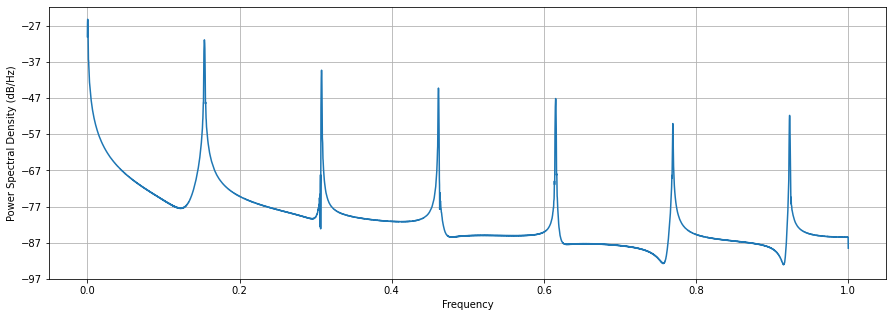

In [8]:
plt.figure(figsize=(15,5))
Pxx,freqs = plt.psd(data,NFFT = fs,noverlap=True)

In [172]:
f = h5py.File(os.path.join('output','spikes.h5'), 'r')
spikesDF = SaveDataToDF(f) 

In [173]:
np.unique(nodesDF['node_type_id'][spikingCellIDs])

array(['AAC in SO layer', 'Pyr in SP layer'], dtype=object)

In [338]:
f = h5py.File(os.path.join('output','spikes.h5'), 'r')

In [37]:
f = h5py.File(os.path.join('output','voltage_clamp.h5'), 'r')
vclampDat = SaveDataToDF(f)

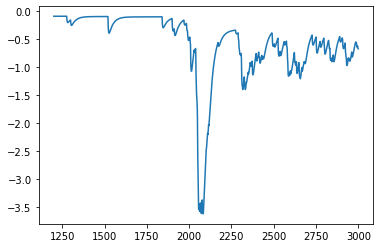

In [41]:
plt.plot(vclampDat['data0'][1200:])
plt.savefig('AAC_vclamp.png')

# plot individual voltage responses

In [44]:
f = h5py.File(os.path.join("output",'v_report.h5'), 'r')
vreports = SaveDataToDF(f)

f = h5py.File(os.path.join('network','biophysical_nodes.h5'), 'r')
nodesDF = SaveDataToDF(f)
f = h5py.File(os.path.join('output','spikes.h5'), 'r')
spikesDF = SaveDataToDF(f) 

f = h5py.File(os.path.join("output",'v_report_axon.h5'), 'r')
axonsDF = SaveDataToDF(f)


spikingCellIDs = np.unique(np.array(spikesDF['node_ids'],dtype=int))
print(spikingCellIDs)
print(len(spikingCellIDs))


cellLocations = pd.read_csv('cell_locations.csv')
idNames = np.unique(nodesDF['node_type_id'])
cellNames = np.unique(cellLocations['Cell type'])
array = cellLocations['Cell type']
idxs = np.unique(cellLocations['Cell type'],return_index=True)[1]
cellNames = [array[index] for index in sorted(idxs)]#use the names in the order in which the id's appear

nodesDF = nodesDF.replace({'node_type_id':idNames},{'node_type_id':cellNames})

[    1     2     3 ... 18276 18277 18278]
16950


In [63]:
nodesDF['node_type_id'][spikingCellIDs]

1        AAC in SO layer
2        AAC in SO layer
3        AAC in SO layer
4        AAC in SO layer
5        AAC in SO layer
6        AAC in SO layer
7        AAC in SO layer
8        AAC in SO layer
9        AAC in SO layer
10       AAC in SO layer
11       AAC in SO layer
12       AAC in SO layer
13       AAC in SO layer
14       AAC in SO layer
15       AAC in SO layer
16       AAC in SO layer
17       AAC in SO layer
18       AAC in SO layer
19       AAC in SO layer
192      Pyr in SP layer
194      Pyr in SP layer
195      Pyr in SP layer
196      Pyr in SP layer
197      Pyr in SP layer
198      Pyr in SP layer
199      Pyr in SP layer
200      Pyr in SP layer
201      Pyr in SP layer
202      Pyr in SP layer
205      Pyr in SP layer
              ...       
18026    AAC in SP layer
18027    AAC in SP layer
18028    AAC in SP layer
18029    AAC in SP layer
18030    AAC in SP layer
18031    AAC in SP layer
18032    AAC in SP layer
18033    AAC in SP layer
18034    AAC in SP layer


In [48]:
simTime = np.arange(0,300,0.1)

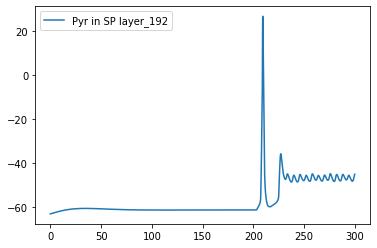

In [65]:
gids = [192]
for gid in gids:
    cellNo = vreports['node_ids'][vreports['node_ids'] == gid].keys()[0]
    name = nodesDF['node_type_id'][vreports['node_ids'][cellNo]]
    plt.plot(simTime,vreports['data'+str(cellNo)][vreports['data'+str(cellNo)].isna()==False],label = name+'_'+str(gid))


plt.legend()
plt.savefig('PN.png')
plt.show()

In [93]:
f = h5py.File(os.path.join("output",'v_report_axon.h5'), 'r')
vreportsA = SaveDataToDF(f)

In [79]:
f = h5py.File(os.path.join('network','biophysical_biophysical_edges.h5'), 'r')
sourceID = f['edges/biophysical_to_biophysical/source_node_id'][()]
targetID = f['edges/biophysical_to_biophysical/target_node_id'][()]
f.close()

In [30]:
sourceID[targetID == 1]

array([   74,   137,   235,   241,   421,   875,  1216,  1224,  1623,
        1840,  2359,  2598,  2841,  2878,  3506,  3750,  4065,  4097,
        4139,  4162,  4263,  4268,  4382,  4415,  4616,  4769,  5041,
        5221,  5549,  5631,  5680,  5821,  6303,  6680,  6696,  7306,
        7426,  7521,  8148,  8520,  8523,  8736,  8786,  9018,  9145,
        9245,  9387,  9409,  9646,  9728, 10077, 10157, 10172, 10229,
       10234, 10313, 10329, 11009, 11772, 11903, 12005, 12079, 12580,
       13603, 13644, 14016, 14506, 14661, 15247, 15362, 16081, 16138,
       17164, 17301, 17303, 17362, 17402, 17783, 18228, 18361, 18428,
       19258, 19345, 19402, 19766, 19786,    26,    28,    31, 20043,
       20045, 20055, 20067, 20070, 20072, 20077], dtype=uint64)

In [146]:
f = h5py.File(os.path.join("output",'v_report_axon.h5'), 'r')
res = f['report/biophysical/data'][()]
f.close()
allStuff = []
for i in range(1,11):
    allStuff.append(res[:,i])

In [147]:
allStuff = np.concatenate(allStuff)

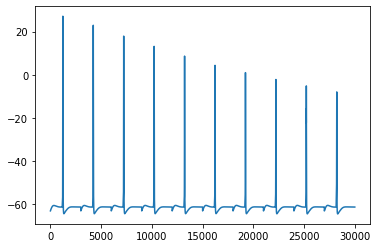

In [148]:
plt.plot(allStuff)
plt.show()

Pyr in SP layer
36


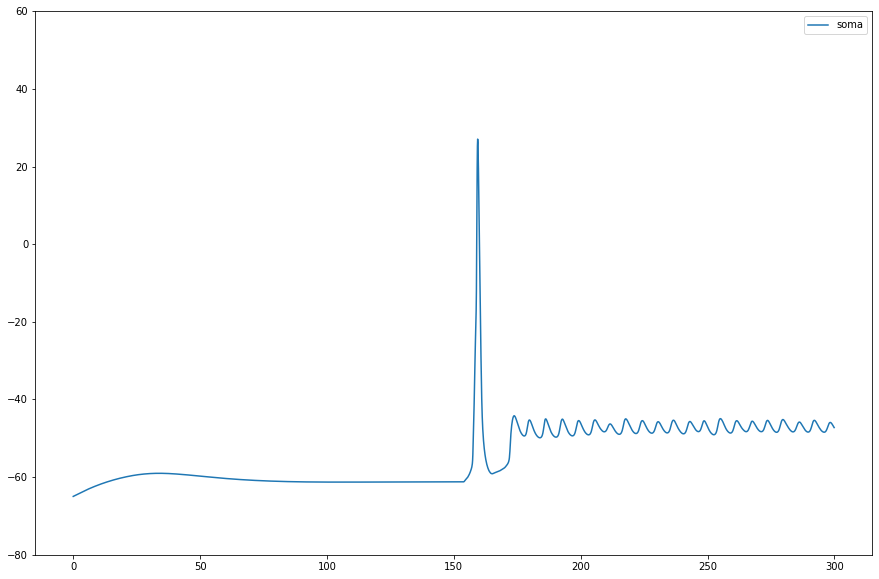

In [326]:
gid = 200
plt.figure(figsize=(15,10))
cellNo = vreports['node_ids'][vreports['node_ids'] == gid].keys()[0]
plt.plot(simTime,vreports['data'+str(cellNo)][vreports['data'+str(cellNo)].isna()==False],label='soma')
#plt.plot(simTime,axonsDF['data6'][axonsDF['data6'].isna()==False],label='axon')
plt.legend()
plt.ylim([-80,60])
print(nodesDF['node_type_id'][vreports['node_ids'][cellNo]])
print(cellNo)

### Connectivity

In [21]:
from math import ceil
NetNo = 20000
IN_num = NetNo*.11#about 11% of all neurons are interneurons in this network (Bezaire 2013). We are only modeling 2, so omit the others, or substitute PV and OLM for all
PN_num = NetNo -  IN_num


numOLM = .043*IN_num # 4% of all INs are OLMs
numPV = .144*IN_num
numPyr = PN_num
numAAC = 0.038*IN_num


# amount of cells per layer
numAAC_inSO = int(ceil(numAAC*0.238))  # sometimes the num will be <1 so always round up so there is at least one.
numPV_inSO = int(ceil(numPV*0.238))
numOLM_inSO = int(ceil(numOLM))

numAAC_inSP = int(ceil(numAAC*0.7))
numPV_inSP = int(ceil(numPV*0.702))
numPyr_inSP = int(ceil(numPyr))

numAAC_inSR = int(ceil(numAAC*0.061))
numPV_inSR = int(ceil(numPV*0.0597))

In [33]:
f = h5py.File(os.path.join('updated_conns','biophysical_biophysical_edges.h5'), 'r')
synsDF = SaveDataToDF(f) 

In [281]:
def percent(item):
    length = len(item)
    
    for key in numDict:
        #print(str(item['source'].iloc[0]))
        #print('{0} {1} = {2}'.format(key,str(item['source'].iloc[0]),key == str(item['source'].iloc[0])))
        if str(key) == str(item['source'].iloc[0]):
            
            return length/numDict[key]


In [280]:
conns = pd.concat([pd.DataFrame(np.array(nodesDF['node_type_id'][synsDF['source_node_id']])), pd.DataFrame(np.array(nodesDF['node_type_id'][synsDF['target_node_id']]))],axis=1)
conns.columns = ['source','target']
#groupConns = conns.groupby(['source','target']).agg(len)
groupConns = conns.groupby(["source","target"]).agg(len)
groupConnspercent = conns.groupby(["source","target"]).agg(percent)


20
20
59
6
95
95
95
95
95
95
95
95
76
76
76
76
76
76
76
223
223
223
223
223
223
223
19
19
19
19
19
19
19
17800
17800
17800
17800
17800
17800
17800


In [278]:
groupConns

source           target         
AAC in SO layer  Pyr in SP layer     13629
AAC in SP layer  Pyr in SP layer     45422
AAC in SR layer  Pyr in SP layer      3989
OLM in SO layer  AAC in SO layer        65
                 AAC in SP layer       273
                 AAC in SR layer        18
                 OLM in SO layer       424
                 PV in SO layer        302
                 PV in SP layer        928
                 PV in SR layer         72
                 Pyr in SP layer     78178
PV in SO layer   AAC in SO layer       118
                 AAC in SP layer       358
                 AAC in SR layer        27
                 PV in SO layer        447
                 PV in SP layer       1278
                 PV in SR layer        103
                 Pyr in SP layer     40907
PV in SP layer   AAC in SO layer       314
                 AAC in SP layer      1049
                 AAC in SR layer       104
                 PV in SO layer       1224
                 PV i

In [277]:
groupConnspercent

source           target         
AAC in SO layer  Pyr in SP layer    681.450000
AAC in SP layer  Pyr in SP layer    769.864407
AAC in SR layer  Pyr in SP layer    664.833333
OLM in SO layer  AAC in SO layer      0.684211
                 AAC in SP layer      2.873684
                 AAC in SR layer      0.189474
                 OLM in SO layer      4.463158
                 PV in SO layer       3.178947
                 PV in SP layer       9.768421
                 PV in SR layer       0.757895
                 Pyr in SP layer    822.926316
PV in SO layer   AAC in SO layer      1.552632
                 AAC in SP layer      4.710526
                 AAC in SR layer      0.355263
                 PV in SO layer       5.881579
                 PV in SP layer      16.815789
                 PV in SR layer       1.355263
                 Pyr in SP layer    538.250000
PV in SP layer   AAC in SO layer      1.408072
                 AAC in SP layer      4.704036
                 AAC in SR 

In [166]:
numDict = {"AAC in SO layer":numAAC_inSO,
           "PV in SO layer":numPV_inSO,
           "OLM in SO layer":numOLM_inSO,
           "AAC in SP layer":numAAC_inSP,
           "PV in SP layer":numPV_inSP,
           "Pyr in SP layer":numPyr_inSP,
           "AAC in SR layer":numAAC_inSR,
           "PV in SR layer":numPV_inSR,
          }

In [82]:
numDict

{'numAAC_inSO': 20,
 'numPV_inSO': 76,
 'numOLM_inSO': 95,
 'numAAC_inSP': 59,
 'numPV_inSP': 223,
 'numPyr_inSP': 17800,
 'numAAC_inSR': 6,
 'numPV_inSR': 19}

In [ ]:
groupConns['']

In [270]:
conns = pd.concat([pd.DataFrame(np.array(nodesDF['node_type_id'][synsDF['source_node_id']])), pd.DataFrame(np.array(nodesDF['node_type_id'][synsDF['target_node_id']]))],axis=1)
conns.columns = ['source','target']
groupConns = conns.groupby(['source','target']).apply(len).reset_index(name='#conns')
groupConns

,source,target,#conns
0,AAC in SO layer,Pyr in SP layer,13629
1,AAC in SP layer,Pyr in SP layer,45422
2,AAC in SR layer,Pyr in SP layer,3989
3,OLM in SO layer,AAC in SO layer,65
4,OLM in SO layer,AAC in SP layer,273
5,OLM in SO layer,AAC in SR layer,18
6,OLM in SO layer,OLM in SO layer,424
7,OLM in SO layer,PV in SO layer,302
8,OLM in SO layer,PV in SP layer,928
9,OLM in SO layer,PV in SR layer,72


In [71]:
for source in groupConns['source']:
    if 

0      13629
1      45422
2       3989
3         65
4        273
5         18
6        424
7        302
8        928
9         72
10     78178
11       118
12       358
13        27
14       447
15      1278
16       103
17     40907
18       314
19      1049
20       104
21      1224
22      3848
23       348
24    123302
25        26
26       105
27         2
28        98
29       322
30        40
31     11061
32      1836
33      6091
34       521
35    123897
36     17949
37     54725
38      4856
Name: #conns, dtype: int64

In [43]:
groupConns.keys()

MultiIndex(levels=[['AAC in SO layer', 'AAC in SP layer', 'AAC in SR layer', 'OLM in SO layer', 'PV in SO layer', 'PV in SP layer', 'PV in SR layer', 'Pyr in SP layer'], ['AAC in SO layer', 'AAC in SP layer', 'AAC in SR layer', 'OLM in SO layer', 'PV in SO layer', 'PV in SP layer', 'PV in SR layer', 'Pyr in SP layer']],
           labels=[[0, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7], [7, 7, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 4, 5, 6, 7, 0, 1, 2, 4, 5, 6, 7, 0, 1, 2, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6]],
           names=['source', 'target'])

In [47]:
groupConns.values

array([ 13629,  45422,   3989,     65,    273,     18,    424,    302,
          928,     72,  78178,    118,    358,     27,    447,   1278,
          103,  40907,    314,   1049,    104,   1224,   3848,    348,
       123302,     26,    105,      2,     98,    322,     40,  11061,
         1836,   6091,    521, 123897,  17949,  54725,   4856])

In [61]:
groupConns.keys

<bound method Series.keys of source           target         
AAC in SO layer  Pyr in SP layer     13629
AAC in SP layer  Pyr in SP layer     45422
AAC in SR layer  Pyr in SP layer      3989
OLM in SO layer  AAC in SO layer        65
                 AAC in SP layer       273
                 AAC in SR layer        18
                 OLM in SO layer       424
                 PV in SO layer        302
                 PV in SP layer        928
                 PV in SR layer         72
                 Pyr in SP layer     78178
PV in SO layer   AAC in SO layer       118
                 AAC in SP layer       358
                 AAC in SR layer        27
                 PV in SO layer        447
                 PV in SP layer       1278
                 PV in SR layer        103
                 Pyr in SP layer     40907
PV in SP layer   AAC in SO layer       314
                 AAC in SP layer      1049
                 AAC in SR layer       104
                 PV in SO layer    

In [252]:
sum(conns['source']=='AAC in SP layer')

0

In [80]:
i = 2
nodesDF['node_type_id'][nodesDF['node_id'][sourceID[targetID == AACIDXS.iloc[i]]]]

NameError: name 'AACIDXS' is not defined

In [158]:
f = h5py.File(os.path.join(pathname,'biophysical_biophysical_edges.h5'), 'r')
edgesDF = SaveDataToDF(f) 

# LFP Processing

In [55]:
from scipy.signal import butter, lfilter, resample, filtfilt
from scipy.stats import zscore
from scipy.fft import fft, fftfreq, fftshift

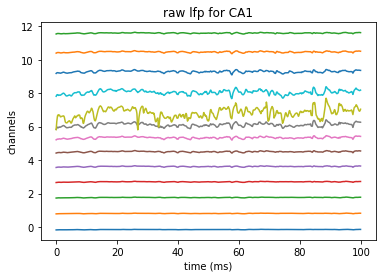

In [40]:
tsim = 300
lfp_file = "output/ecp.h5"
f = h5py.File(lfp_file,'r')
lfp = list(f['ecp']['data'])
lfp_arr = np.asarray(lfp)
lfp = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
for i in range(13):
    lfp[i] = lfp_arr[:,i]
    lfp[i] = [(x*10)+i for x in lfp[i]]
    temp = lfp[i]
    temp = temp[1500:2500]
    plt.plot(np.arange(0,100,0.1),temp)
plt.xlabel('time (ms)')
plt.ylabel('channels')
plt.title("raw lfp for CA1")
plt.show()

In [42]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

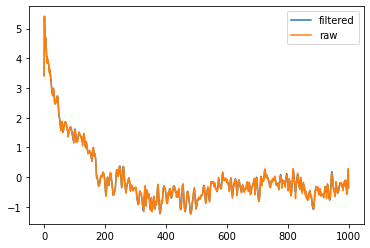

In [47]:
# Filter requirements.
order = 6
fs = 10000       # sample rate, Hz
cutoff = 500  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
data=lfp[0]

y = butter_lowpass_filter(data, cutoff, fs, order)
filtered= resample(y, 1000)
filtered = zscore(filtered)

data = resample(data, 1000)
raw = zscore(data)

plt.plot(np.arange(0,1000, 1), filtered, label='filtered')
plt.plot(np.arange(0,1000, 1), raw, label='raw')

plt.legend()
plt.show()

In [52]:
t = np.arange(len(filtered))

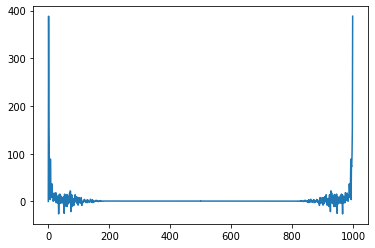

In [53]:
fftRes = scipy.fft.fft(filtered)
plt.plot(t,fftRes.real)

In [113]:
hist, bin_edges = np.histogram(fftRes.real/max(fftRes.real), bins=200)

In [57]:

sp = fftshift(fft(filtered))
freq = fftshift(fftfreq(t.shape[-1]))

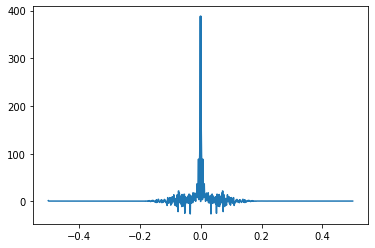

In [68]:
plt.plot(freq,sp.real)

In [201]:
nonzeros = np.array([r for r in fftRes if r != 0])

In [122]:
hist, bin_edges = np.histogram(fftRes.real,bins=200)

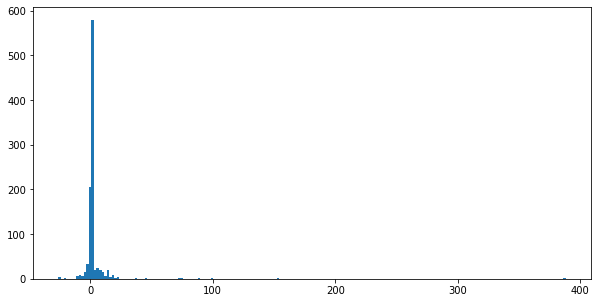

In [203]:
plt.figure(figsize=(10,5))
plt.hist(nonzeros.real,bins=200)
plt.show()

# TESTING

In [336]:
from bmtk.utils.reports.spike_trains import PoissonSpikeGenerator

In [30]:
psg = PoissonSpikeGenerator(population='bgpn')

psg.add(node_ids=1,  # need same number as cells
        firing_rate=50000,    # 1 spike every 5 seconds Hz
        times=(1/1000, 2/1000))  # time is in seconds for some reason


In [21]:
psg.to_sonata('CA1_inputs/bg_pn_spikes.h5')

In [31]:
print('Number of spikes: {}'.format(psg.n_spikes()))
print('Units: {}'.format(psg.units()))

psg.to_dataframe()

Number of spikes: 52
Units: ms


,node_ids,timestamps,population
0,1,1.054939,bgpn
1,1,1.063110,bgpn
2,1,1.106914,bgpn
3,1,1.144070,bgpn
4,1,1.155733,bgpn
5,1,1.193693,bgpn
6,1,1.194066,bgpn
7,1,1.198494,bgpn
8,1,1.210716,bgpn
9,1,1.216851,bgpn


In [30]:
tst = psg.to_dataframe()
tst.iloc[10]

node_ids              1
timestamps    19.309215
population         bgpn
Name: 10, dtype: object

In [32]:
pathname = 'CA1_inputs'
f = h5py.File(os.path.join(pathname,'bg_pn_spikes.h5'), 'r')
f.visit(print)

spikes
spikes/bgpn
spikes/bgpn/node_ids
spikes/bgpn/timestamps


In [37]:
tst = SaveDataToDF(f)

In [44]:
tst.head(20)

,node_ids,timestamps
0,0.0,81.784365
1,0.0,93.590084
2,0.0,139.894619
3,0.0,144.310465
4,0.0,147.109625
5,0.0,159.124039
6,0.0,159.366370
7,0.0,180.782293
8,0.0,186.320028
9,1.0,3.910261


In [3]:
f['spikes/bgpn//node_ids'][()]

array([ 1,  7,  7,  7,  8,  9, 10, 12, 15, 15, 16, 18, 19, 23, 23, 29, 29,
       29, 30, 30, 34, 38, 46, 52, 53, 54, 55, 57, 57, 60, 62, 62, 63],
      dtype=int64)

In [40]:
dir(psg)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_fixed_fr',
 '_build_inhomegeous_fr',
 'adaptor',
 'add',
 'from_csv',
 'from_nwb',
 'from_sonata',
 'load',
 'max_spikes_per_node',
 'time_range']

In [41]:
psg.time_range()

(200.10935571208424, 295.10472372879343)

In [124]:
f.close()

In [20]:
psg.to_csv('CA1_inputs/bg_pn_spikes.txt')

In [3]:
pathname = 'CA1_inputs'

In [24]:
tst = np.loadtxt('CA1_inputs/bg_pn_spikes.txt')

ValueError: could not convert string to float: 'timestamps'

In [6]:
tst = pd.read_csv('CA1_inputs/bg_pn_spikes.txt')
test = np.array(tst)

In [7]:
with h5py.File('bg_pn_spikes.hdf5','w') as f:
    f['bg_pn'] = test


In [5]:
f = h5py.File(os.path.join(pathname,'bg_pn_spikes.hdf5'), 'r')
f.visit(print)

dataset


# run testing

In [428]:
import random
#from bmtk.builder import NetworkBuild
seed = 999
random.seed(seed)
np.random.seed(seed)

#net = NetworkBuilder("biophysical")
# amount of cells
numAAC = 50  # 147
numCCK = 10  # 360
numNGF = 10  # 580
numOLM = 10 # 164
numPV = 10  # 553
numPyr = 10  # 31150

# arrays for cell location csv
cell_name = []
cell_x = []
cell_y = []
cell_z = []
# amount of cells per layer
numAAC_inSO = int(round(numAAC*0.238))
numAAC_inSP = int(round(numAAC*0.7))
numAAC_inSR = int(round(numAAC*0.062))
numCCK_inSO = int(round(numCCK*0.217))
numCCK_inSP = int(round(numCCK*0.261))
numCCK_inSR = int(round(numCCK*0.325))
numCCK_inSLM = int(round(numCCK*0.197))
numNGF_inSR = int(round(numNGF*0.17))
numNGF_inSLM = int(round(numNGF*0.83))
numPV_inSO = int(round(numPV*0.238))
numPV_inSP = int(round(numPV*0.701))
numPV_inSR = int(round(numPV*0.0596))

totalCellNum = numAAC_inSO + numAAC_inSP + numAAC_inSR + numCCK_inSO + numCCK_inSP + numCCK_inSR + numCCK_inSLM + numNGF_inSR + numNGF_inSLM + numPV_inSO + numPV_inSP + numPV_inSR


# total 400x1000x450
# Order from top to bottom is SO,SP,SR,SLM total
# SO layer
xside_length = 400; yside_length = 1000; height = 450; min_dist = 20
x_grid = np.arange(0, xside_length+min_dist, min_dist)
y_grid = np.arange(0, yside_length+min_dist, min_dist)
z_grid = np.arange(320, height+min_dist, min_dist)
xx, yy, zz = np.meshgrid(x_grid, y_grid, z_grid)
pos_list_SO = np.vstack([xx.ravel(), yy.ravel(), zz.ravel()]).T

# SP layer
xside_length = 400; yside_length = 1000; height = 320; min_dist = 8
x_grid = np.arange(0, xside_length+min_dist, min_dist)
y_grid = np.arange(0, yside_length+min_dist, min_dist)
z_grid = np.arange(290, height+min_dist, min_dist)
xx, yy, zz = np.meshgrid(x_grid, y_grid, z_grid)
pos_list_SP = np.vstack([xx.ravel(), yy.ravel(), zz.ravel()]).T

# SR
xside_length = 400; yside_length = 1000; height = 290; min_dist = 20
x_grid = np.arange(0, xside_length+min_dist, min_dist)
y_grid = np.arange(0, yside_length+min_dist, min_dist)
z_grid = np.arange(80, height+min_dist, min_dist)
xx, yy, zz = np.meshgrid(x_grid, y_grid, z_grid)
pos_list_SR = np.vstack([xx.ravel(), yy.ravel(), zz.ravel()]).T

# SLM
xside_length = 400; yside_length = 1000; height = 79; min_dist = 20
x_grid = np.arange(0, xside_length+min_dist, min_dist)
y_grid = np.arange(0, yside_length+min_dist, min_dist)
z_grid = np.arange(0, height+min_dist, min_dist)
xx, yy, zz = np.meshgrid(x_grid, y_grid, z_grid)
pos_list_SLM = np.vstack([xx.ravel(), yy.ravel(), zz.ravel()]).T

# ############ SO LAYER ############ #
# AAC
# Pick location
inds = np.random.choice(np.arange(0, np.size(pos_list_SO, 0)), numAAC_inSO, replace=False)
pos = pos_list_SO[inds, :]



In [429]:
inds

array([4018, 7531, 2256, 1764, 7771, 1294, 7433, 4930, 1049, 8500, 7073,
       3594])

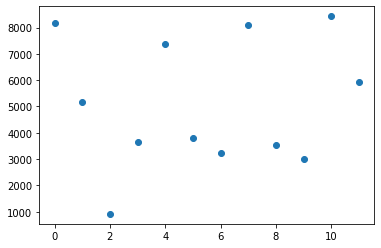

In [461]:
plt.scatter(np.arange(0,len(inds)),inds)

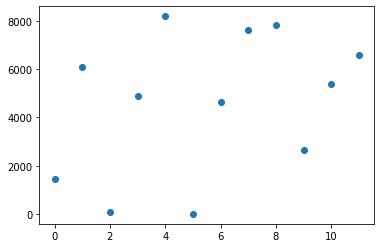

In [460]:
plt.scatter(np.arange(0,len(Idxs)),Idxs)

In [436]:
np.size(pos_list_SO, 0)

8568

In [437]:
pos_list_SO.shape[0]

8568

In [467]:
rng = np.random.default_rng(999)
Idxs = rng.choice(np.arange(0, pos_list_SO.shape[0]), numAAC_inSO, replace=False)

In [455]:
inds = np.random.choice(np.arange(0, np.size(pos_list_SO, 0)), numAAC_inSO, replace=False)
pos = pos_list_SO[inds, :]

In [468]:
Idxs

array([1465, 1491, 1448, 6425, 6964, 1474,  878, 1548, 6109, 1317, 7727,
       6665])

In [457]:
inds

array([8190, 5169,  919, 3644, 7372, 3808, 3216, 8096, 3523, 2994, 8429,
       5927])

In [458]:
np.std(inds)

2366.396385681542

In [459]:
np.std(Idxs)

2805.8984140061493

In [387]:
gParams = np.array([0,0,320,400,1000,450])
def make_layer_grid(xstart,ystart,zstart,x_length,y_length,z_length,min_dist):
    x_grid = np.arange(xstart, x_length+min_dist, min_dist)
    y_grid = np.arange(ystart, y_length+min_dist, min_dist)
    z_grid = np.arange(zstart, z_length+min_dist, min_dist)
    xx, yy, zz = np.meshgrid(x_grid, y_grid, z_grid)
    return np.vstack([xx.ravel(), yy.ravel(), zz.ravel()]).T
    

In [389]:
pos_list_SO_test = make_layer_grid(0,0,320,400,1000,450,20)

In [8]:
import h5py
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [9]:
import os, sys
from bmtk.simulator import bionet
import numpy as np
import synapses
import warnings
from bmtk.simulator.core import simulation_config
from bmtk.simulator.bionet.pyfunction_cache import add_weight_function

In [10]:
def gaussianBL(edge_props, source, target):
    w0 = edge_props["syn_weight"]
    sigma = edge_props["weight_sigma"]
    return np.random.normal(w0, sigma, 1)

def lognormal(edge_props, source, target):
    m = edge_props["syn_weight"]
    s = edge_props["weight_sigma"]
    mean = np.log(m) - 0.5 * np.log((s / m) ** 2 + 1)
    std = np.sqrt(np.log((s / m) ** 2 + 1))
    return np.random.lognormal(mean, std, 1)

In [11]:
synapses.load()

In [12]:
add_weight_function(lognormal)
add_weight_function(gaussianBL)

In [13]:
conf = bionet.Config.from_json('simulation_configLFP.json')

In [14]:
conf.build_env()

2022-06-09 14:34:28,707 [INFO] Created log file


In [19]:
graph = bionet.BioNetwork.from_config(conf)

In [22]:
from bmtk.builder.networks import NetworkBuilder

In [23]:
bgpn = NetworkBuilder('bgpn')
bgpn.add_nodes(
    N=10,
    pop_name='bgpn',
    potential='exc',
    model_type='virtual'
)

In [27]:
print(graph.get_node_set('all').population_names())

['biophysical']


In [9]:
pop = graph._node_populations['biophysical']
for node in pop.get_nodes():
    node._node._node_type_props['morphology'] = node.model_template[1]


In [10]:
cells = graph.get_local_cells()
for cell in cells:
    cells[cell].hobj.insert_mechs(cells[cell].gid)
    pass

In [11]:
sim = bionet.BioSimulator.from_config(conf, network=graph)

2022-06-09 14:23:15,434 [INFO] Building cells.
2022-06-09 14:23:15,722 [INFO] Building recurrent connections
2022-06-09 14:23:15,801 [INFO] Building virtual cell stimulations for bgpn


In [ ]:
cortex.add_nodes(
    cell_name='Scnn1a_473845048',
    potental='exc',
    model_type='biophysical',
    model_template='ctdb:Biophys1.hoc',
    model_processing='aibs_perisomatic',
    dynamics_params='472363762_fit.json',
    morphology='Scnn1a_473845048_m.swc'
)

In [ ]:
thalamus.add_nodes(
    N=100,
    pop_name='tON',
    potential='exc',
    model_type='virtual'
)

In [31]:
graph.add_nodes(tst)

AttributeError: 'DataFrame' object has no attribute 'name'

In [20]:
dir(graph)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_cell',
 '_cells_built',
 '_components',
 '_connections_initialized',
 '_edge_adaptors',
 '_edge_populations',
 '_gap_juncs',
 '_gid_pool',
 '_init_connections',
 '_io',
 '_model_type_map',
 '_morphologies_cache',
 '_morphology_lookup',
 '_node_adaptors',
 '_node_populations',
 '_node_sets',
 '_rank_node_gids',
 '_rank_node_ids',
 '_rank_nodes_by_model',
 '_register_adaptors',
 '_remote_node_cache',
 '_virtual_nodes',
 'add_component',
 'add_edges',
 'add_node_set',
 'add_nodes',
 'add_spike_trains',
 'build',
 'build_nodes',
 'build_recurrent_edges',
 'build_virtual_connections',
 'calc_seg_coords',
 'cell_type_ma

In [20]:
graph._virtual_nodes

{}

In [19]:
dir(graph)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_cell',
 '_cells_built',
 '_components',
 '_connections_initialized',
 '_edge_adaptors',
 '_edge_populations',
 '_gap_juncs',
 '_gid_pool',
 '_init_connections',
 '_io',
 '_model_type_map',
 '_morphologies_cache',
 '_morphology_lookup',
 '_node_adaptors',
 '_node_populations',
 '_node_sets',
 '_rank_node_gids',
 '_rank_node_ids',
 '_rank_nodes_by_model',
 '_register_adaptors',
 '_remote_node_cache',
 '_virtual_nodes',
 'add_component',
 'add_edges',
 'add_node_set',
 'add_nodes',
 'add_spike_trains',
 'build',
 'build_nodes',
 'build_recurrent_edges',
 'build_virtual_connections',
 'calc_seg_coords',
 'cell_type_ma

In [12]:
dir(sim)

['_BioSimulator__elapsed_time',
 '_BioSimulator__tstep_end_block',
 '_BioSimulator__tstep_start_block',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cell_variables',
 '_cell_vars_dir',
 '_celsius',
 '_f_iclamps',
 '_h',
 '_iclamps',
 '_log_file',
 '_nsteps_block',
 '_output_dir',
 '_seclamps',
 '_set_init_conditions',
 '_sim_mods',
 '_spikes',
 '_start_from_state',
 '_v_init',
 'add_mod',
 'attach_current_clamp',
 'attach_file_current_clamp',
 'attach_se_voltage_clamp',
 'biophysical_gids',
 'cell_var_output',
 'cell_variables',
 'celsius',
 'dt',
 'from_config',
 'h',
 'local_gids',
 'n_steps',
 'net',
 'nsteps',
 'nsteps_block',
 'post_fadvance',
 'report_load_b

In [122]:
sim.run()

2022-06-09 13:34:27,797 [INFO] Running simulation for 300.000 ms with the time step 0.100 ms
2022-06-09 13:34:27,798 [INFO] Starting timestep: 0 at t_sim: 0.000 ms
2022-06-09 13:34:27,799 [INFO] Block save every 3000 steps


ValueError: shapes (13,89) and (34,) not aligned: 89 (dim 1) != 34 (dim 0)

NEURON: PyObject method call failed: post_fadvance
 near line 0
 ^
        advance()
      step()
    continuerun(300)
  run(300)


RuntimeError: hoc error

In [14]:
dir(sim)

['_BioSimulator__elapsed_time',
 '_BioSimulator__tstep_end_block',
 '_BioSimulator__tstep_start_block',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cell_variables',
 '_cell_vars_dir',
 '_celsius',
 '_f_iclamps',
 '_h',
 '_iclamps',
 '_log_file',
 '_nsteps_block',
 '_output_dir',
 '_seclamps',
 '_set_init_conditions',
 '_sim_mods',
 '_spikes',
 '_start_from_state',
 '_v_init',
 'add_mod',
 'attach_current_clamp',
 'attach_file_current_clamp',
 'attach_se_voltage_clamp',
 'biophysical_gids',
 'cell_var_output',
 'cell_variables',
 'celsius',
 'dt',
 'from_config',
 'h',
 'local_gids',
 'n_steps',
 'net',
 'nsteps',
 'nsteps_block',
 'post_fadvance',
 'report_load_b